# DSA 210 Project - Ahmet Çavuşoğlu

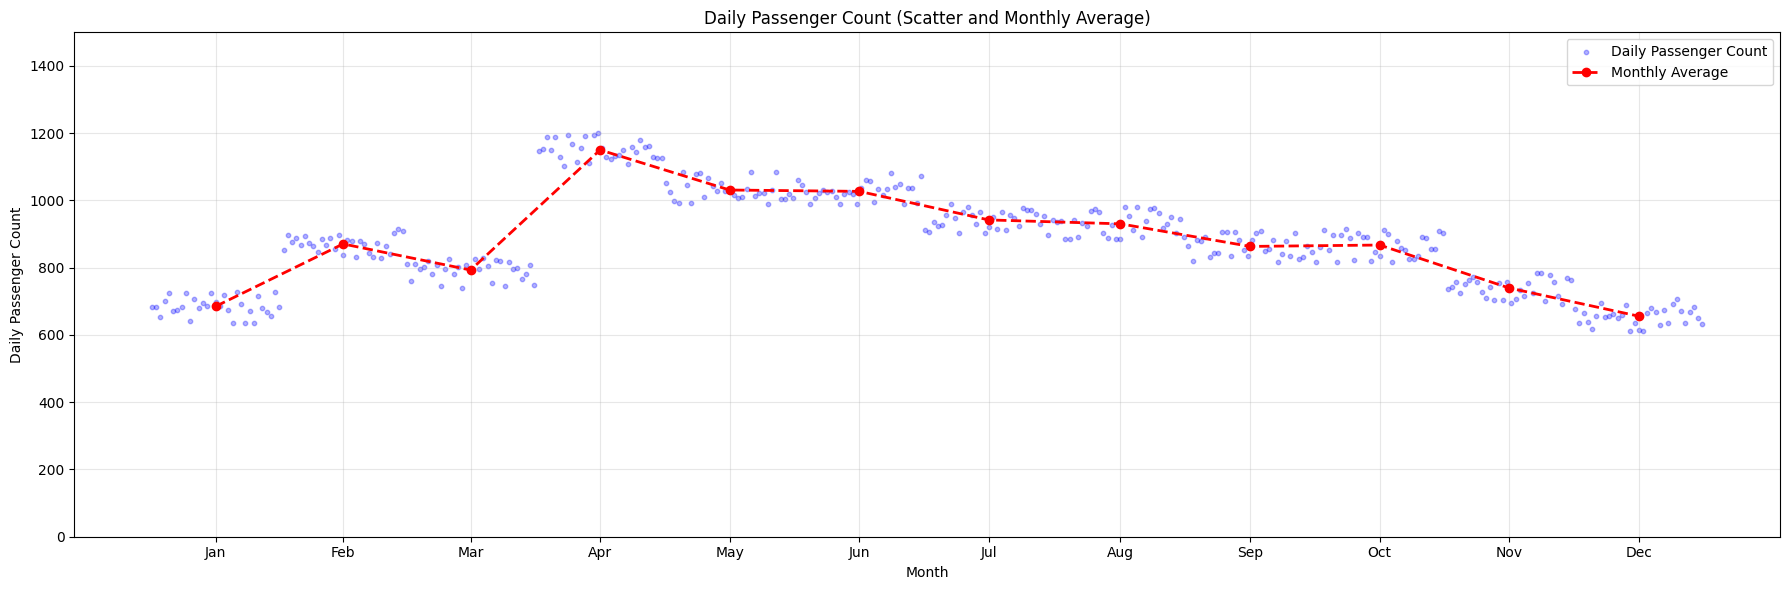

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv("yolcu_hava_2024.csv")
df = df[df["istasyon_adi"] == "BESIKTAS"]  # Only Beşiktaş pier

df["tarih"] = pd.to_datetime(df["tarih"])
df["day"] = (df["tarih"] - pd.Timestamp("2024-01-01")).dt.days + 1
df["month"] = df["tarih"].dt.month

# Daily passenger scatter plot
plt.figure(figsize=(18, 6))
plt.scatter(df["day"], df["gunluk_yolcu"], alpha=0.3,
            s=10, color='blue', label="Daily Passenger Count")

# Plot monthly averages
monthly_avg = df.groupby("month")["gunluk_yolcu"].mean()
month_day_center = df.groupby("month")["day"].mean()  # midpoints of months
plt.plot(month_day_center, monthly_avg, color='red', linestyle='--',
         linewidth=2, marker='o', label="Monthly Average")

# Month names in English
month_names = ["Jan", "Feb", "Mar", "Apr", "May",
               "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
month_ticks = df.groupby("month")["day"].mean()

plt.xticks(month_ticks, month_names)
plt.ylim(0, 1500)
plt.xlabel("Month")
plt.ylabel("Daily Passenger Count")
plt.title("Daily Passenger Count (Scatter and Monthly Average)")
plt.legend()
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


# Bar Chart: Monthly Average Passenger Count
Displays monthly averages of daily passenger counts for Beşiktaş Pier.

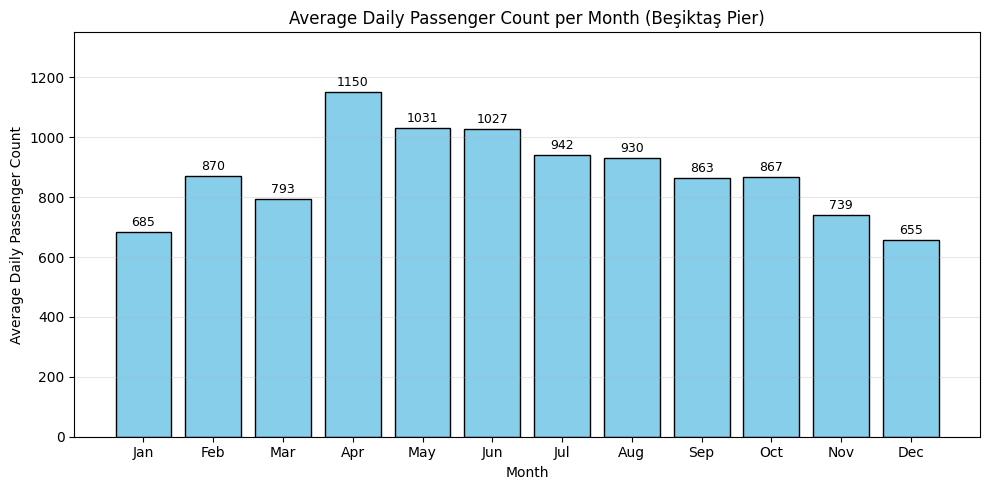

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter for Beşiktaş pier
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["month"] = besiktas_df["date"].dt.month

# Calculate monthly average daily passenger count
monthly_avg = besiktas_df.groupby("month")["gunluk_yolcu"].mean()

# Plot bar chart
plt.figure(figsize=(10, 5))
bars = plt.bar(monthly_avg.index, monthly_avg.values, color='skyblue', edgecolor='black')

# Add value labels on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 10, f"{int(yval)}",
             ha='center', va='bottom', fontsize=9)

# Titles and labels
plt.title("Average Daily Passenger Count per Month (Beşiktaş Pier)")
plt.xlabel("Month")
plt.ylabel("Average Daily Passenger Count")

# Month names as x-axis labels
plt.xticks(range(1, 13), [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
])

# Y-axis limits
plt.ylim(0, max(monthly_avg.values) + 200)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


# Exploratory Data Analysis (EDA)


In [3]:
#Printing statistics
besiktas_df["period"] = besiktas_df["donem"].map({"Okul": "School Term", "Tatil": "Holiday"})

column_mapping = {
    "gunluk_yolcu": "Passenger Count",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "nem": "Humidity (%)",
    "maksimum_sicaklik": "Temperature (°C)"
}

besiktas_df_renamed = besiktas_df.rename(columns=column_mapping)

columns_to_analyze = list(column_mapping.values())

for period in ["School Term", "Holiday"]:
    print(f"\n{period} Statistics:\n")
    
    df_period = besiktas_df_renamed[besiktas_df_renamed["period"] == period]
    
    means = df_period[columns_to_analyze].mean()
    stds = df_period[columns_to_analyze].std()
    vars_ = df_period[columns_to_analyze].var()
    
    stats_df = pd.DataFrame({
        "Mean": means,
        "Standard Deviation": stds,
        "Variance": vars_
    }).round(2)

    print(stats_df)



School Term Statistics:

                     Mean  Standard Deviation  Variance
Passenger Count    866.25              156.84  24599.20
Wind Speed (km/h)   19.53                7.66     58.64
Humidity (%)        63.12                7.28     53.05
Temperature (°C)    22.36                7.88     62.16

Holiday Statistics:

                     Mean  Standard Deviation  Variance
Passenger Count    906.90              107.82  11625.68
Wind Speed (km/h)   17.02                5.35     28.67
Humidity (%)        63.43                7.08     50.20
Temperature (°C)    23.60                7.79     60.61


# Pie Chart: Seasonal Passenger Distribution
This pie chart displays total passenger distribution across seasons.

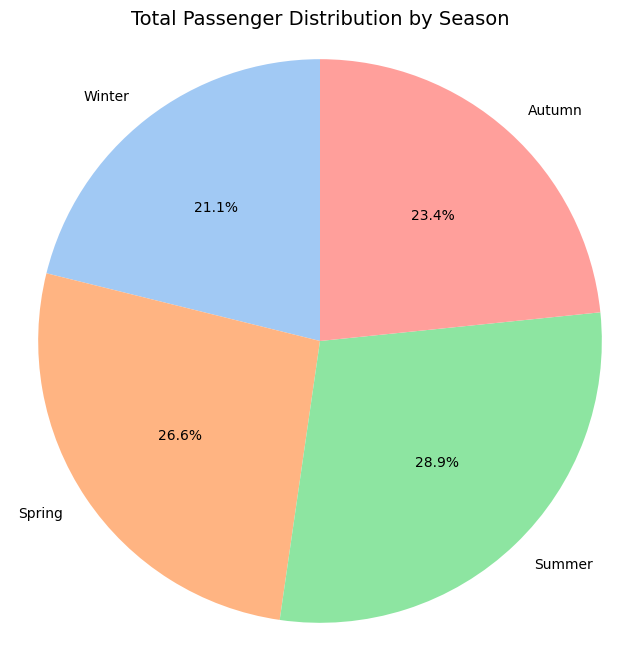

In [4]:
# Season function
def get_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    else:
        return "Autumn"

df["season"] = df["ay"].apply(get_season)

# Total passenger count by season
season_total = df.groupby("season")["gunluk_yolcu"].sum().reindex([
    "Winter", "Spring", "Summer", "Autumn"])

# Pie Chart
plt.figure(figsize=(8, 8))
colors = sns.color_palette("pastel")
plt.pie(season_total, labels=season_total.index,
        autopct="%1.1f%%", colors=colors, startangle=90)
plt.title("Total Passenger Distribution by Season", fontsize=14)
plt.axis('equal')  # Keeps it a circle
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

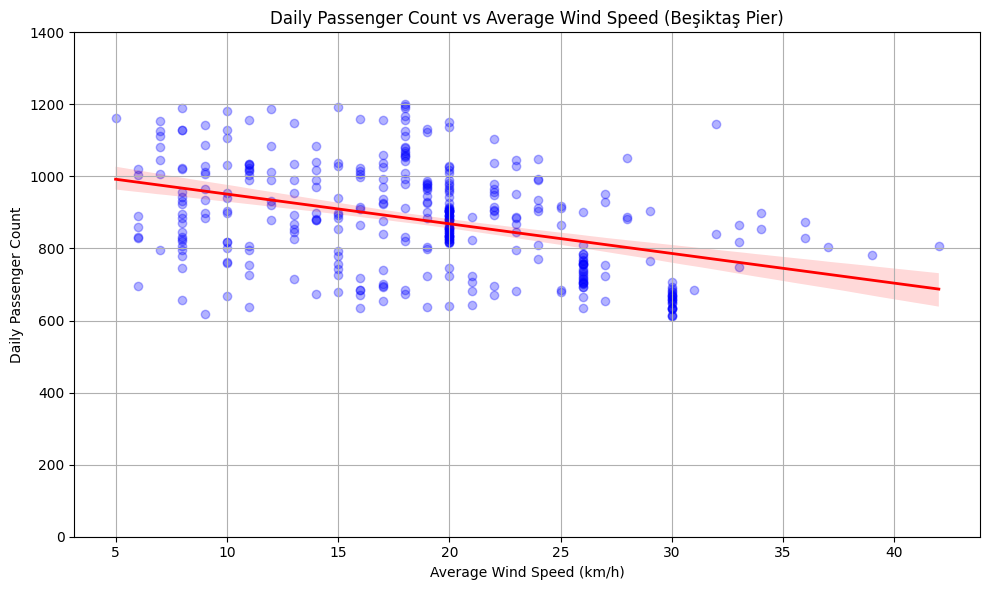

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter only for Beşiktaş pier
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Drop missing values
df_clean = besiktas_df[["gunluk_yolcu", "ruzgar_hizi"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="ruzgar_hizi",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Average Wind Speed (Beşiktaş Pier)")
plt.xlabel("Average Wind Speed (km/h)")
plt.ylabel("Daily Passenger Count")
plt.grid(True)
plt.ylim(0, 1400)
plt.tight_layout()
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

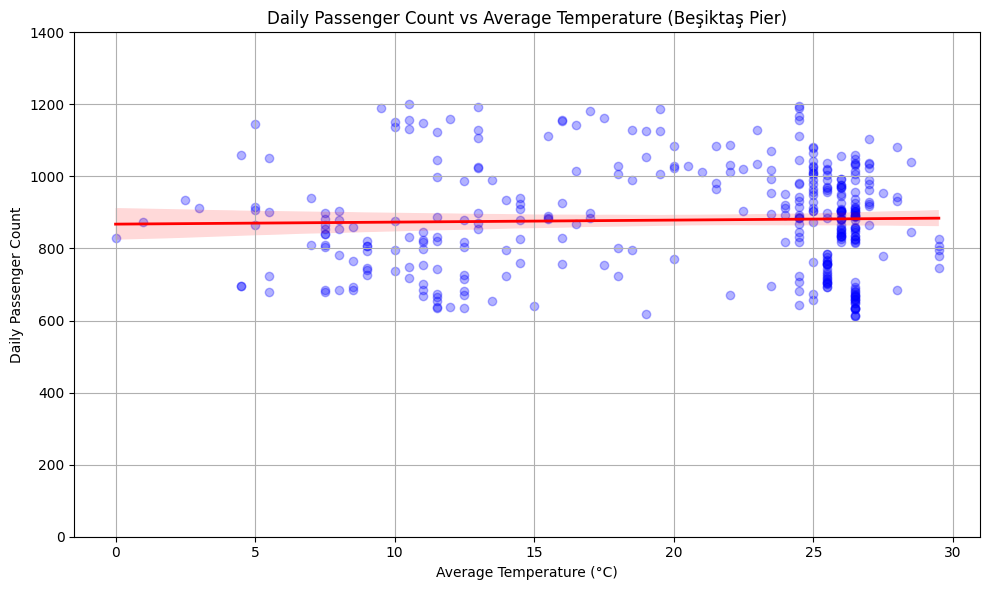

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter dataset
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate average temperature
besiktas_df["average_temperature"] = (besiktas_df["maksimum_sicaklik"] + besiktas_df["minimum_sicaklik"]) / 2

# Drop missing values if any
df_clean = besiktas_df[["average_temperature", "gunluk_yolcu"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="average_temperature",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Average Temperature (Beşiktaş Pier)")
plt.xlabel("Average Temperature (°C)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True)
plt.tight_layout()
plt.show()


# Visualization: General Plot
This figure presents a plotted analysis related to passenger count and weather features.

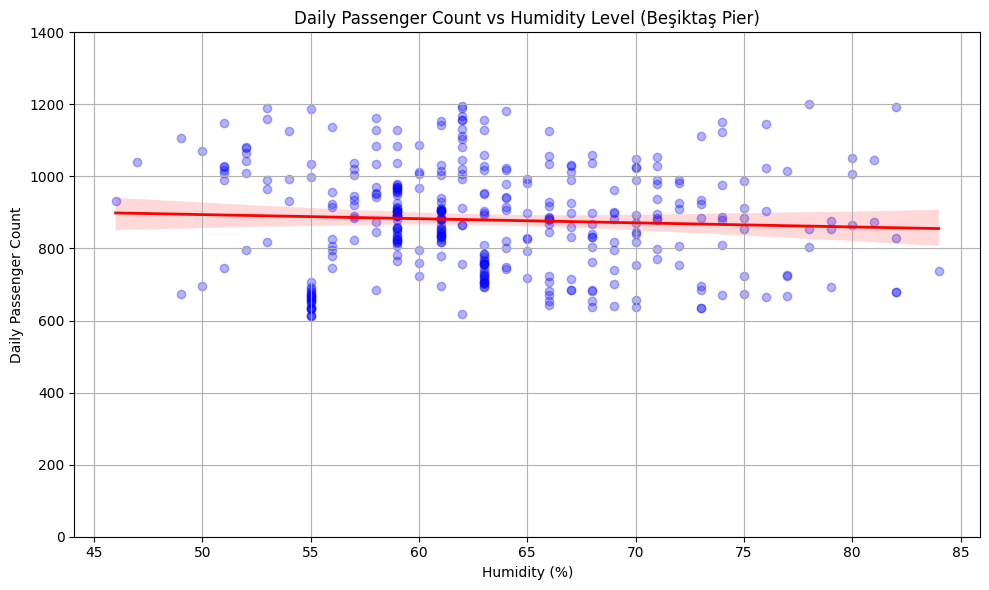

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Drop missing values
df_clean = besiktas_df[["nem", "gunluk_yolcu"]].dropna()

# Plot
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df_clean,
    x="nem",
    y="gunluk_yolcu",
    scatter_kws={"alpha": 0.3, "color": "blue"},
    line_kws={"color": "red", "linewidth": 2}
)

plt.title("Daily Passenger Count vs Humidity Level (Beşiktaş Pier)")
plt.xlabel("Humidity (%)")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True)
plt.tight_layout()
plt.show()


# Boxplot: Distribution by School and Holiday Periods
Compares daily passenger count distributions for different school periods.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_64078/736343268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=besiktas_df, x="period_label", y="gunluk_yolcu", palette="pastel")


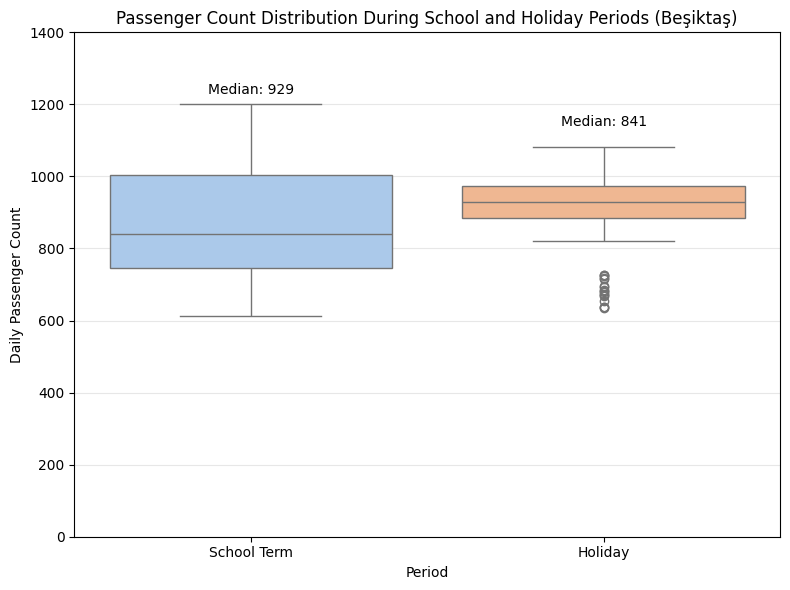

In [8]:
# Encode period numerically and label it in English
besiktas_df["period_numeric"] = besiktas_df["donem"].map({"Okul": 1, "Tatil": 0})
besiktas_df["period_label"] = besiktas_df["period_numeric"].map({0: "Holiday", 1: "School Term"})

# Boxplot
plt.figure(figsize=(8, 6))
ax = sns.boxplot(data=besiktas_df, x="period_label", y="gunluk_yolcu", palette="pastel")

# Add median text
grouped_median = besiktas_df.groupby("period_label")["gunluk_yolcu"].median()
for i, median_val in enumerate(grouped_median):
    ax.text(i, median_val + 300, f"Median: {int(median_val)}",
            horizontalalignment='center', color='black', fontsize=10)

# Labels and formatting
plt.title("Passenger Count Distribution During School and Holiday Periods (Beşiktaş)")
plt.xlabel("Period")
plt.ylabel("Daily Passenger Count")
plt.ylim(0, 1400)
plt.grid(True, axis='y', alpha=0.3)
plt.tight_layout()
plt.show()


In [9]:
from scipy.stats import ttest_ind
import pandas as pd

# Load the dataset and filter for Beşiktaş pier
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Map 'donem' column to numeric: Holiday = 0, School = 1
besiktas_df["donem_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})

# Separate passenger counts
holiday_passengers = besiktas_df[besiktas_df["donem_numeric"] == 0]["gunluk_yolcu"]
school_passengers = besiktas_df[besiktas_df["donem_numeric"] == 1]["gunluk_yolcu"]

# Perform independent two-sample t-test
t_stat, p_val = ttest_ind(holiday_passengers, school_passengers, equal_var=False)

# One-tailed p-value (testing if holiday > school)
p_one_tailed = p_val / 2 if t_stat > 0 else 1 - (p_val / 2)

# Decision based on alpha = 0.05
alpha = 0.05
if p_one_tailed < alpha:
    print(f"H0 is rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: The average number of daily passengers is significantly higher during holidays.")
else:
    print(f"H0 is not rejected. p-value = {p_one_tailed:.4f}")
    print("Conclusion: There is no statistically significant difference between holidays and school terms.")


H0 is rejected. p-value = 0.0021
Conclusion: The average number of daily passengers is significantly higher during holidays.


In [18]:
from scipy.stats import pearsonr
import pandas as pd

# Load dataset
df = pd.read_csv("yolcu_hava_2024.csv")

# Filter for Beşiktaş pier
df_besiktas = df[df["istasyon_adi"] == "BESIKTAS"]

# Calculate Pearson correlation coefficient and p-value
corr, p_value = pearsonr(df_besiktas["ruzgar_hizi"], df_besiktas["gunluk_yolcu"])

# Print results
print(f"Pearson Correlation Coefficient: {corr:.3f}")
print(f"p-value: {p_value:.6f}")


Pearson Correlation Coefficient: -0.406
p-value: 0.000000


In [10]:
from scipy.stats import pearsonr
import pandas as pd

# Load and filter Beşiktaş-only data
df = pd.read_csv("yolcu_hava_2024.csv")
df_besiktas = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate average temperature
df_besiktas["average_temperature"] = (df_besiktas["maksimum_sicaklik"] + df_besiktas["minimum_sicaklik"]) / 2

# Pearson correlation: Humidity vs Passenger Count
corr_humidity, p_val_humidity = pearsonr(df_besiktas["nem"], df_besiktas["gunluk_yolcu"])
print(f"Humidity vs Daily Passenger Count → Correlation: {corr_humidity:.3f}, p-value: {p_val_humidity:.4f}")

# Pearson correlation: Average Temperature vs Passenger Count
corr_temp, p_val_temp = pearsonr(df_besiktas["average_temperature"], df_besiktas["gunluk_yolcu"])
print(f"Average Temperature vs Daily Passenger Count → Correlation: {corr_temp:.3f}, p-value: {p_val_temp:.4f}")

# Encode 'donem' column: 0 = Holiday, 1 = School Term
df_besiktas["school_term_numeric"] = df_besiktas["donem"].apply(lambda x: 0 if x == "Tatil" else 1)

# Pearson correlation: School Term vs Passenger Count
corr_school, p_val_school = pearsonr(df_besiktas["school_term_numeric"], df_besiktas["gunluk_yolcu"])
print(f"School Term vs Daily Passenger Count → Correlation: {corr_school:.3f}, p-value: {p_val_school:.4f}")


Humidity vs Daily Passenger Count → Correlation: -0.057, p-value: 0.2758
Average Temperature vs Daily Passenger Count → Correlation: 0.029, p-value: 0.5850
School Term vs Daily Passenger Count → Correlation: -0.131, p-value: 0.0122


# Correlation Heatmap: Weather and Passenger Numbers
Illustrates correlations between weather variables and passenger count.

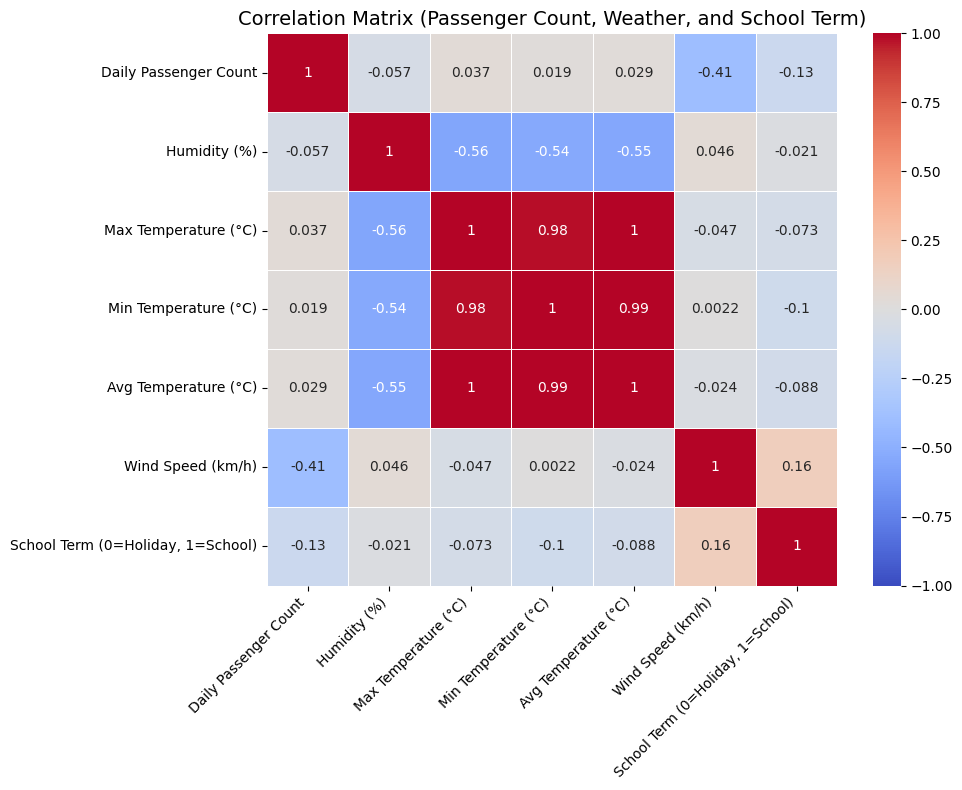

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Convert date
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])

# New columns
besiktas_df["school_term_numeric"] = besiktas_df["donem"].map({"Tatil": 0, "Okul": 1})
besiktas_df["avg_temperature"] = (
    besiktas_df["maksimum_sicaklik"] + besiktas_df["minimum_sicaklik"]
) / 2

# Build English-named DataFrame
heatmap_df = besiktas_df.rename(columns={
    "gunluk_yolcu": "Daily Passenger Count",
    "nem": "Humidity (%)",
    "maksimum_sicaklik": "Max Temperature (°C)",
    "minimum_sicaklik": "Min Temperature (°C)",
    "ruzgar_hizi": "Wind Speed (km/h)",
    "avg_temperature": "Avg Temperature (°C)",
    "school_term_numeric": "School Term (0=Holiday, 1=School)"
})[
    [
        "Daily Passenger Count",
        "Humidity (%)",
        "Max Temperature (°C)",
        "Min Temperature (°C)",
        "Avg Temperature (°C)",
        "Wind Speed (km/h)",
        "School Term (0=Holiday, 1=School)"
    ]
]

# Correlation matrix
corr_matrix = heatmap_df.corr()

# Heatmap plot
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Correlation Matrix (Passenger Count, Weather, and School Term)", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


# Grouped Bar Plot: Wind Condition and Passenger Count
Visualizes the impact of wind conditions throughout the week.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_64078/4242932059.py:17: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


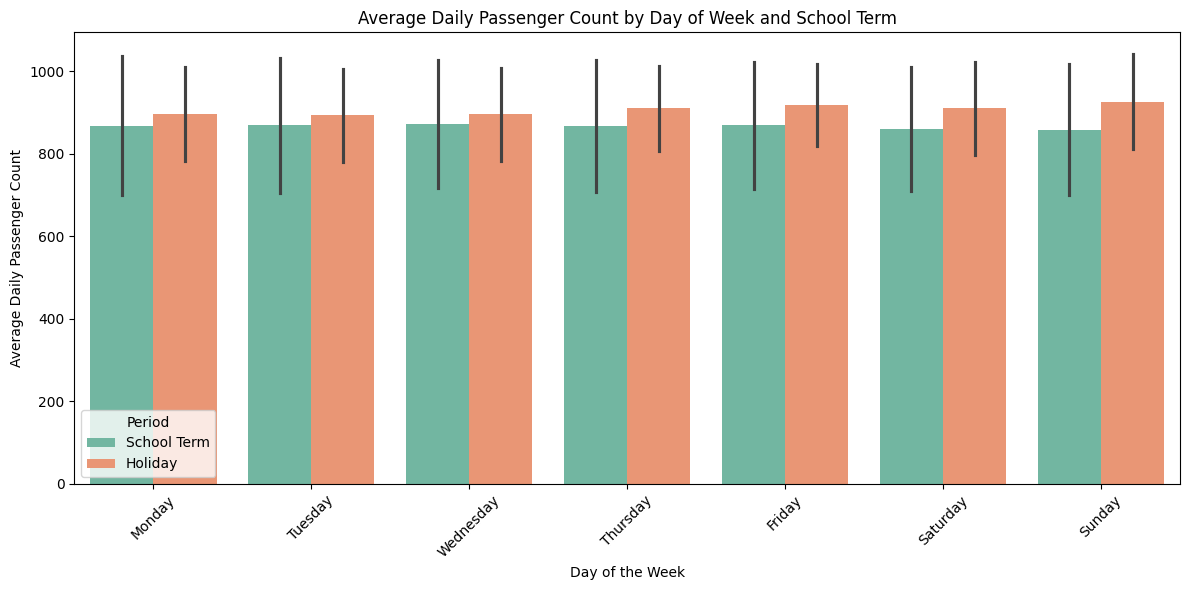

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Prepare necessary columns
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["date"].dt.day_name()
besiktas_df["period"] = besiktas_df["donem"].map({"Tatil": "Holiday", "Okul": "School Term"})
besiktas_df["daily_passenger_count"] = besiktas_df["gunluk_yolcu"]

# Multivariate bar plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="daily_passenger_count",
    hue="period",
    ci="sd",
    palette="Set2"
)

plt.title("Average Daily Passenger Count by Day of Week and School Term")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Period")
plt.tight_layout()
plt.show()


# Grouped Bar Plot: Wind Condition and Passenger Count
Visualizes the impact of wind conditions throughout the week.

/var/folders/wm/mhx3phdx7hxdwldjjhld7m9r0000gn/T/ipykernel_64078/859352611.py:29: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.barplot(


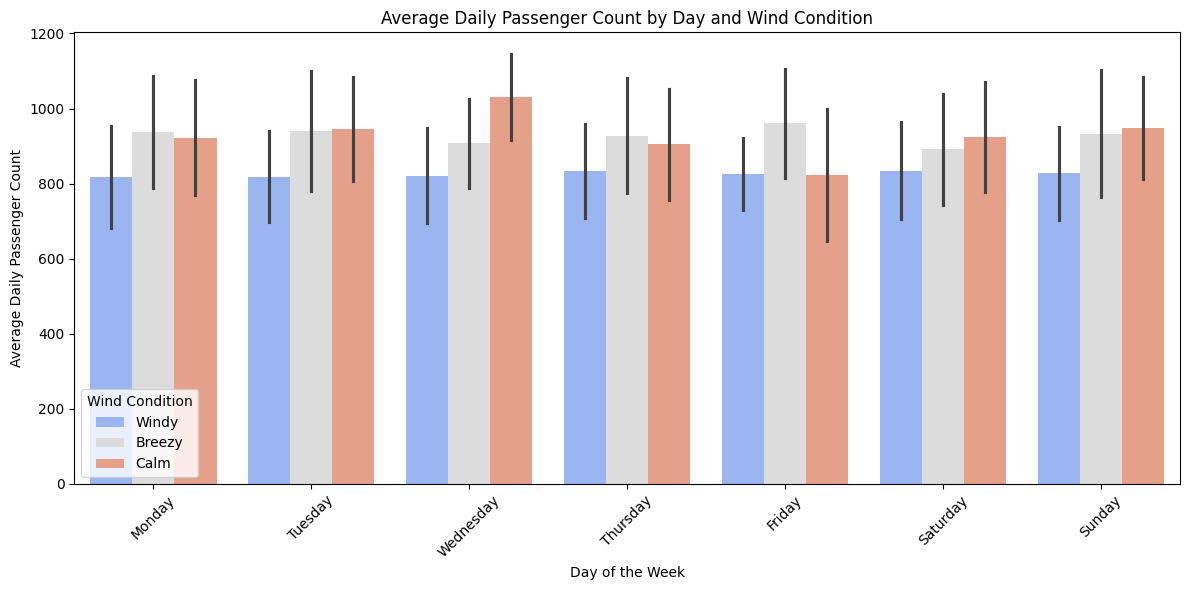

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load and filter Beşiktaş-only data
df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Convert wind speed to category labels
def wind_category(speed):
    if speed < 10:
        return "Calm"
    elif speed < 20:
        return "Breezy"
    else:
        return "Windy"

besiktas_df["wind_condition"] = besiktas_df["ruzgar_hizi"].apply(wind_category)

# Convert date and extract day name
besiktas_df["date"] = pd.to_datetime(besiktas_df["tarih"])
besiktas_df["day_of_week"] = besiktas_df["date"].dt.day_name()

# Rename for plotting
besiktas_df["daily_passenger_count"] = besiktas_df["gunluk_yolcu"]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(
    data=besiktas_df,
    x="day_of_week",
    y="daily_passenger_count",
    hue="wind_condition",
    ci="sd",
    palette="coolwarm"
)

plt.title("Average Daily Passenger Count by Day and Wind Condition")
plt.xlabel("Day of the Week")
plt.ylabel("Average Daily Passenger Count")
plt.xticks(rotation=45)
plt.legend(title="Wind Condition")
plt.tight_layout()
plt.show()


In [14]:
from scipy.stats import pearsonr
import pandas as pd

df = pd.read_csv("yolcu_hava_2024.csv")
besiktas_df = df[df["istasyon_adi"] == "BESIKTAS"].copy()

# Calculate Pearson correlation
pearson_coef, p_val = pearsonr(besiktas_df["ruzgar_hizi"], besiktas_df["gunluk_yolcu"])
print("Pearson Correlation Coefficient:", pearson_coef)
print("p-value:", p_val)


Pearson Correlation Coefficient: -0.40563644983610064
p-value: 6.273449728041423e-16
